

#Can we predict the likelihood of a booking cancellation based on its booking features?
##Spring 2025 Data Science Project
####By Alma Hagstrom, Avanti Athavale, Stacy Sun, Ella Banting
####May 1st, 2025

## Contributions
Alma Hagstrom contributed to the project by writing the final research question and performed a binomial test on location data as part of the data exploration. She also wrote the project introduction and team contributions section, and helped compile the final tutorial report.

Avanti Athavale conducted a Poisson analysis on the number of location types per month during data exploration and authored the conclusion section to summarize the project’s findings.

Stacy Sun proposed the original idea of analyzing hotel booking data, curated and preprocessed the dataset, and developed the random forest model including its training and testing code.

Ella Banting analyzed the relationship between hotel type and booking cancellations using a chi-squared test and created the visualizations used in the results and analysis.

#Table of Contents
1. Introduction
2. Data curation
3. Exploratory data analysis
4. Primary analysis
5. Visualization
6. Insights and Conclusions

#1. Introduction

Hotel booking cancellation is a common challenge in the hospitality industry, which affects revenue forecast, resource plan and customer satisfaction. This project explains if we can correctly guess the possibility of cancellation of booking using key features from hotel reservation data. In particular, we check the type of hotel type, deposit type, customer type, lead time, number of booking changes, estimated cancellation possibility based on previous booking, details of arrival date and duration of total stay.

The central question that guides this analysis is: Can we guess whether the hotel booking will be canceled on the basis of booking characteristics and customer behavior? By answering this question, the hotel managers can guess better canceling, adapt overbooking strategies and improve operating efficiency. Accurate cancellation predictions can also reduce financial losses due to more reported business decisions, individual customer experience, and unexpected no-show or late cancellation.

This work uses machine learning techniques, including feature engineering and a random one classifier, to evaluate the future powering power of selected booking facilities. Results provide valuable insights into drivers of booking canceling and display the practical value of data-manual decision making in the hotel industry.


#2. Data Curation

Hotel Booking Demand by Jesse Mostipak on Kaggle: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/data

In [1]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binomtest
from scipy.stats import poisson
import numpy as np
from scipy.stats import chisquare
from scipy import stats
from datetime import datetime

#downloading the dataset

path = kagglehub.dataset_download("jessemostipak/hotel-booking-demand")

#importing the dataset and putting it in a dataframe
hotels_df = pd.read_csv(path + "/hotel_bookings.csv")


hotels_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [2]:
hotels_df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [3]:
#analyzing data types to check if parsing is needed.
hotels_df.dtypes

,0
hotel,object
is_canceled,int64
lead_time,int64
arrival_date_year,int64
arrival_date_month,object
arrival_date_week_number,int64
arrival_date_day_of_month,int64
stays_in_weekend_nights,int64
stays_in_week_nights,int64
adults,int64


In [4]:
#most columns look good, but note that children is a float: parse children to ints (can't be half a child)
print(hotels_df['children'].unique())

# replace na with -1 for hotel bookings that have nan as a children value
hotels_df['children'] = hotels_df['children'].fillna(-1)
hotels_df['children'] = hotels_df['children'].astype(int)

#confirm the dtype has been changed
print(hotels_df['children'].dtype)

[ 0.  1.  2. 10.  3. nan]
int64


In [5]:
#convert month from an object to an int
print(hotels_df['arrival_date_month'].unique())

hotels_df['arrival_date_month'] = hotels_df['arrival_date_month'].apply(lambda x: datetime.strptime(x, "%B").month)

#verify data type has been changed
print(hotels_df['arrival_date_month'].dtype)



['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
int64


#3. Exploratory Data Analysis

City Hotel bookings: 79330
Total bookings: 119390
Observed proportion: 0.6645
P-value: 0.0000
Reject H0
The proportion of City Hotel bookings is significantly different from 50%.


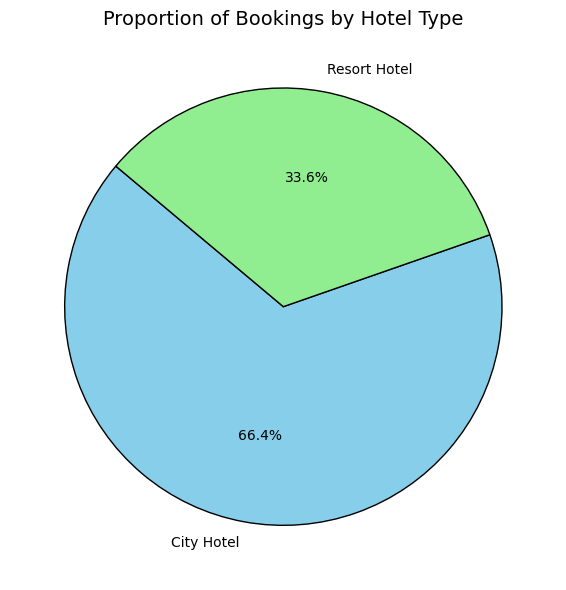

In [6]:
# Conclusion 1: Is our data split evenly between city and resort hotel bookings?
# Statistical Method: Binomial Test
# Null Hypothesis (H₀): City hotel bookings are 50% of our data
# Alternative Hypothesis (H₁): City hotel bookings are not 50% of our data

city_bookings = (hotels_df['hotel'] == 'City Hotel').sum()
total_bookings = len(hotels_df)
observed_prop = city_bookings / total_bookings

# Binomial test: Is city hotel proportion ≠ 0.5
p_null = 0.5
result = binomtest(city_bookings, total_bookings, p=p_null, alternative='two-sided')

print(f"City Hotel bookings: {city_bookings}")
print(f"Total bookings: {total_bookings}")
print(f"Observed proportion: {observed_prop:.4f}")
print(f"P-value: {result.pvalue:.4f}")
print("Reject H0" if result.pvalue < 0.05 else "Fail to reject H0")
if result.pvalue < 0.05:
    print("The proportion of City Hotel bookings is significantly different from 50%.")
else:
    print("There's no significant difference; bookings may be evenly split.")


# plot
hotel_counts = hotels_df['hotel'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    hotel_counts.values,
    labels=hotel_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['skyblue', 'lightgreen'],
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Proportion of Bookings by Hotel Type', fontsize=14)
plt.tight_layout()
plt.show()


P-value: 5.679418913846111e-150
Reject H0
The different between lead times for city & resort hotels is significantly different.


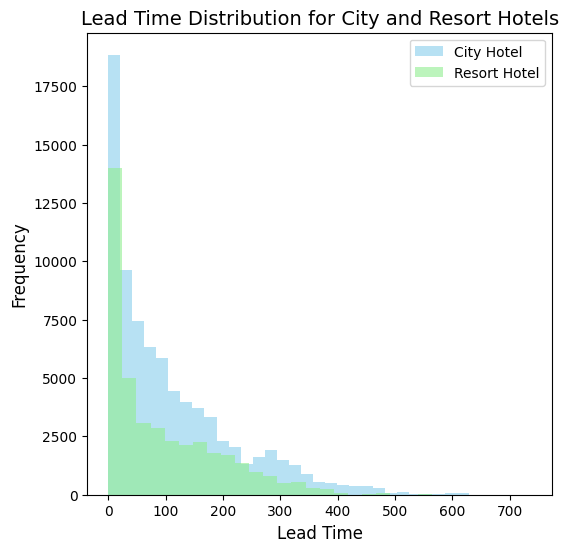

In [7]:
# Conclusion 2: Is the average lead time for city and resorts hotels stastically different?
# Statistical Method: T-Test
# Null Hypothesis (H₀): Lead time for city & resort hotels is the statistically similar.
# Alternative Hypothesis (H₁): Lead time for city & resort hotels is statistically different.

df_city = hotels_df[hotels_df['hotel'] == 'City Hotel']
df_resort = hotels_df[hotels_df['hotel'] == 'Resort Hotel']

t_value, p_value = stats.ttest_ind(df_city['lead_time'], df_resort['lead_time'])

print(f"P-value: {p_value}")
print("Reject H0" if p_value < 0.05 else "Fail to reject H0")
if p_value < 0.05:
    print("The different between lead times for city & resort hotels is significantly different.")
else:
    print("There's no significant difference between lead times for city and resort hotels.")


# plot
plt.figure(figsize=(6, 6))
plt.hist(df_city['lead_time'], bins=30, alpha=0.6, color='skyblue', label='City Hotel')
plt.hist(df_resort['lead_time'], bins=30, alpha=0.6, color='lightgreen', label='Resort Hotel')
plt.title('Lead Time Distribution for City and Resort Hotels', fontsize=14)
plt.xlabel('Lead Time', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()


Contingency Table:
is_canceled       0      1
hotel                     
City Hotel    46228  33102
Resort Hotel  28938  11122 

P-value: 0.0
Reject H0
There is a signifigant statistical relationship between booking cancellation and hotel type.


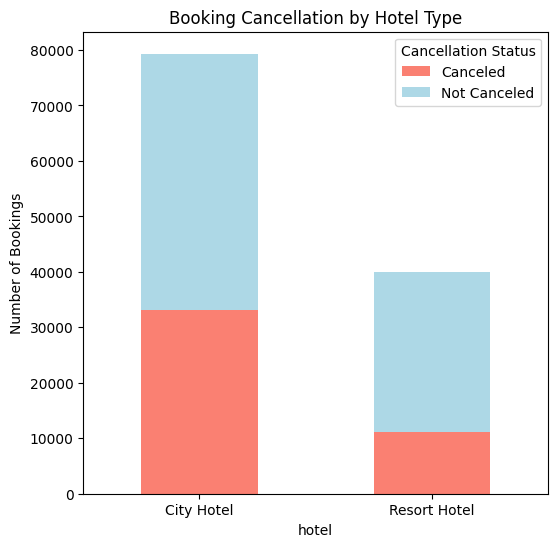

In [8]:
# Conclusion 3: Is booking cancellation rate independent of hotel type?
# Statistical Method: Chi-squared test for independance
# Null Hypothesis (H₀): The booking cancellation rate is independent of hotel type.
# Alternative Hypothesis (H₁):
# There is a signifigant statistical relationship between booking cancellation and hotel type.

contingency_table = pd.crosstab(hotels_df['hotel'], hotels_df['is_canceled'])
print("Contingency Table:")
print(contingency_table, "\n")


from scipy.stats import chi2_contingency
chi2, p_value, dof, expected  = chi2_contingency(contingency_table)

print(f"P-value: {p_value}")
print("Reject H0" if p_value < 0.05 else "Fail to reject H0")
if p_value < 0.05:
    print("There is a signifigant statistical relationship between booking cancellation and hotel type.")
else:
    print("The booking cancellation rate is independent of hotel type.")


#create the plot
hotels_df['Cancellation Status'] = hotels_df['is_canceled'].map({1: 'Canceled', 0: 'Not Canceled'})
contingency_table2 = pd.crosstab(hotels_df['hotel'], hotels_df['Cancellation Status'])
ax = contingency_table2.plot(kind='bar', stacked=True, figsize=(6,6), color=["salmon", "lightblue"])
plt.ylabel('Number of Bookings')
plt.title('Booking Cancellation by Hotel Type')
plt.xticks(rotation=0)
plt.legend(title='Cancellation Status')
plt.show()

#4. Primary analysis

Our question is can we accurately predict whether a hotel booking will be canceled using features such as hotel type, deposit type, customer type, lead time, number of booking changes, estimated cancellation probability based on past behavior, arrival year and month, and total stay duration? Because of this, we chose random forest. Since the task is to determine whether a booking will be canceled based on categorical and numerical features, a classification model like Random Forest is well-suited. It provides interpretability (feature importance), handles a mix of feature types, and performs well with minimal preprocessing.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#create two new columns: probability of cancellation based on prev. bookings and total stay time (weekdays + weeknight)
hotels_df['cancellation_prob'] = hotels_df['previous_bookings_not_canceled'] / (hotels_df['previous_bookings_not_canceled'] + hotels_df['previous_cancellations'])
hotels_df['total_stay_time'] = hotels_df['stays_in_week_nights'] + hotels_df['stays_in_weekend_nights']

#separate features into categorical or numerical
categorical_features = ['hotel', 'deposit_type', 'customer_type']
numerical_features = ['lead_time', 'booking_changes', 'cancellation_prob', 'arrival_date_year', 'arrival_date_month', 'total_stay_time']

# include more features in addition to the relevant features based on EDA insights
target = 'is_canceled'

X = hotels_df[categorical_features + numerical_features]
y = hotels_df[target]

#use one hot encoding to turn feature engineer/encode categorical variables
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
])

#use the Random Forest Classifier
pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84     14907
           1       0.75      0.68      0.72      8971

    accuracy                           0.80     23878
   macro avg       0.79      0.77      0.78     23878
weighted avg       0.79      0.80      0.79     23878



#5. Visualization


To understand which variables were most influential in predicting cancellations, we plotted the feature importances from the trained Random Forest model. Features like lead time, deposit type and total stay time were the strongest predictors of cancellations. This highlights that both booking behavior and financial commitment play key roles in whether customers follow through with their reservations.




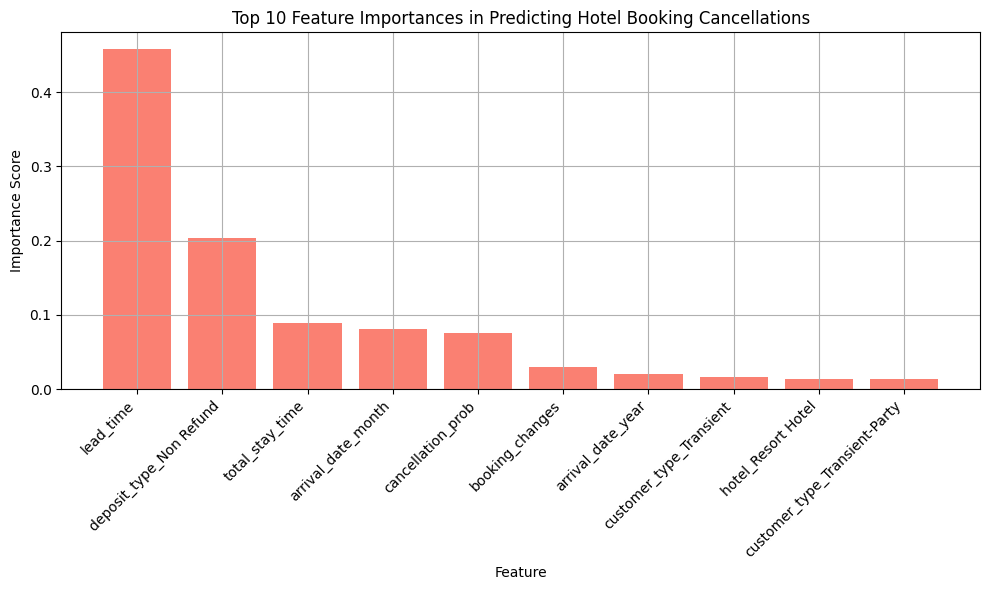

In [10]:
import matplotlib.pyplot as plt
import numpy as np

feature_names = (
    numerical_features +
    list(pipeline.named_steps['preprocess'].transformers_[1][1].get_feature_names_out(categorical_features))
)

importances = pipeline.named_steps['classifier'].feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances in Predicting Hotel Booking Cancellations")
plt.bar(range(10), importances[indices[:10]], align="center", color="salmon")
plt.xticks(range(10), [feature_names[i] for i in indices[:10]], rotation=45, ha='right')
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.grid(True)
plt.show()


#6. Insights and Conclusions

After reading through this project, a user should feel like they understand the material and the concept and that they have been able to learn a lot about hotels. Only one of our group members was knowledgeable about hotels before the start of this project, and this project has been able to teach the rest of us a lot about hotel statistics. While most of the features that our project found seem extremely self explantory, like whether or not a deposit is refundable, it was very insightful to see how it compared to other factors like total stay time, arrival date month, and arrival date year.

Our first step of the entire process was to understand the data. We found all of the different columns which correlated to all of the different information we had about each hotel, and we found what type each of these columns were, so we could accurately process the data. We then performed a basic cleaning of the data.

We then did some exploratory data analysis with a binomial test, t-test, and chi-squared test for independence to learn more about our data. We found what percent of hotels were city vs. resort hotels, how many city vs. resort hotels cancelled and didn't cancel, and finally the difference between lead times for city and resort hotels.

Finally, did our primary ML analysis and those values were used to create our visualization. Our visualization fully summarized our results, and this helps any user learn more about hotels. The user will learn that the type of deposit and the lead time are by the far the most important in detemining if a booking will be cancelled.